In [3]:
#load tensor data from unlearning/logs/ResNet_3x16-2x32-2x64/incorrect_predictions.pt
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


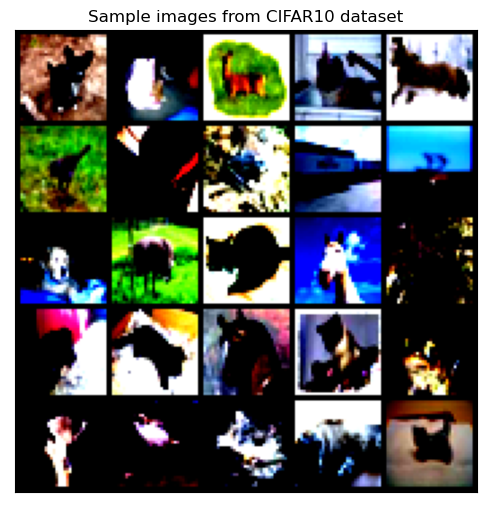

In [60]:
#plot images in input data
from torchvision.utils import make_grid
fig, ax = plt.subplots(figsize=(12, 6))
plt.title("Sample images from CIFAR10 dataset")
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(make_grid(data["inputs"].cpu()[:25],nrow=5).permute(1,2,0).numpy())
plt.show()

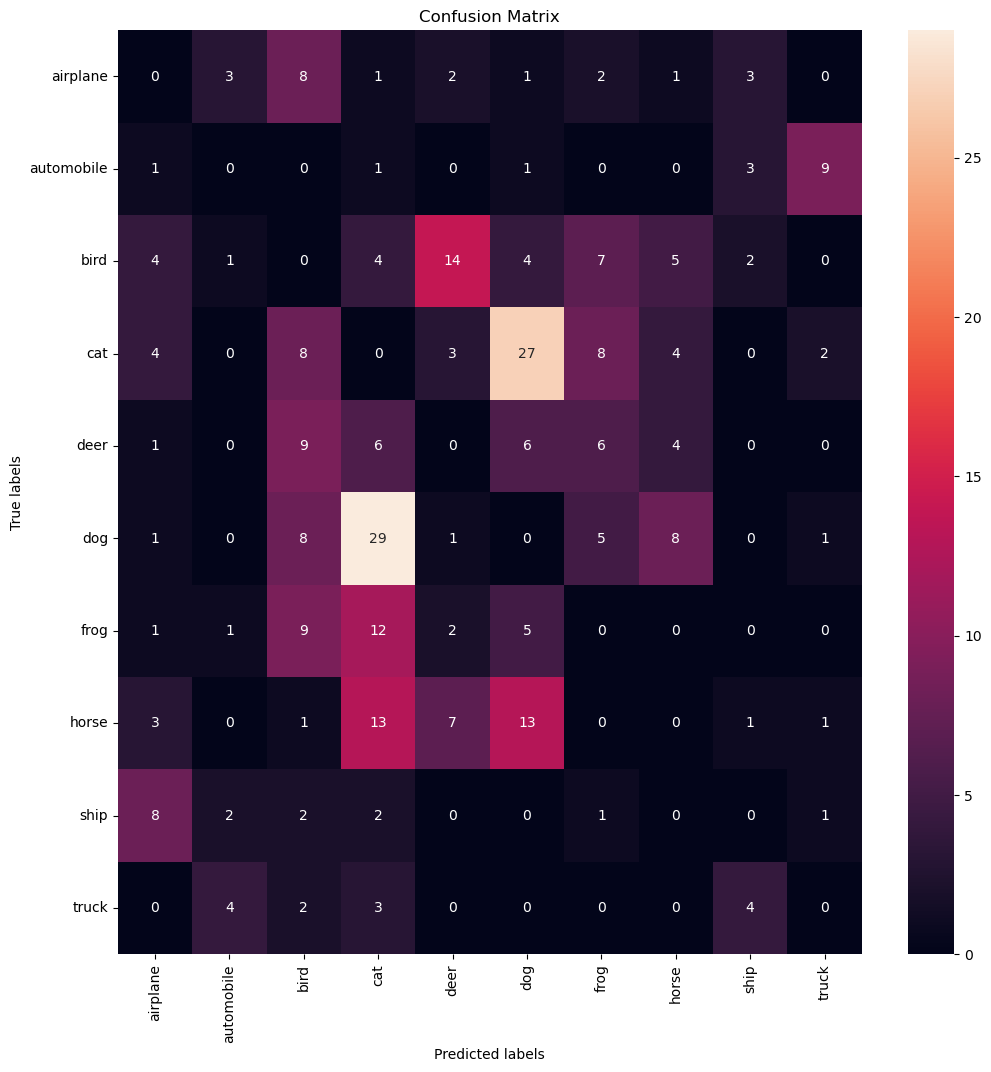

In [61]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
class_labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
cm = confusion_matrix(data["targets"].cpu().numpy(),torch.argmax(data["probs"],dim=1).cpu().numpy())
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cm, annot=True, ax=ax,fmt='g',xticklabels=class_labels,yticklabels=class_labels)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_labels,rotation=90)
ax.yaxis.set_ticklabels(class_labels,rotation=0)
plt.show()
#sns.heatmap(df.pivot_table(index=0,columns=1,values=2,aggfunc="mean").fillna(0).to_numpy(),annot=True, fmt=".2f",xticklabels=class_labels,yticklabels=class_labels)

In [4]:
#how confident is the model in its incorrect predictions
#work with index as well

new_data = []
for epoch in range(100):
    data = torch.load(os.path.join("logs","finetune_ResNet_3x16-2x32-2x64",f"debug_predictions_{epoch}.pt"))
    df = pd.DataFrame(zip(data["targets"].cpu().numpy(),torch.argmax(data["probs"],dim=1).cpu().numpy(),torch.max(data["probs"],dim=1).values.cpu().numpy()))
    transformed_array = df.pivot_table(index=0,columns=1,values=2,aggfunc="mean").fillna(0).to_numpy()
    new_data.append(transformed_array)
timeseries_data = np.stack(new_data, axis=0)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0.9697852  0.97174376 0.97009355 0.97560024 0.9687767  0.969454
 0.96663016 0.96976614 0.9687759  0.97221917 0.969768   0.9699408
 0.9769681  0.97152567 0.9690759  0.9715128  0.96670794 0.9710821
 0.97413033 0.9699907  0.9724871  0.9669026  0.968587   0.96828026
 0.9735902  0.96873134 0.97590476 0.97581184 0.97472143 0.9638479
 0.9726127  0.9764784  0.97037446 0.9670364  0.96834517 0.970081
 0.9690434  0.970016   0.96968555 0.9665344  0.9702444  0.96678746
 0.9729519  0.96713066 0.9645869  0.9692734  0.97213066 0.9694787
 0.9714049  0.96627057 0.97367847 0.97126096 0.9742606  0.9672974
 0.97221035 0.9704018  0.9698277  0.9691143  0.97222817 0.97174513
 0.9730752  0.96832526 0.9687044 

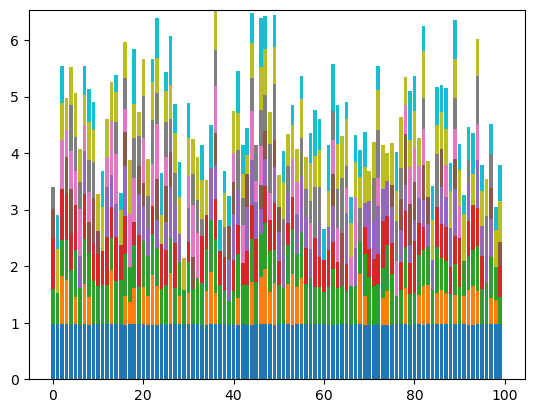

In [52]:
#creare a stacked bar chart
for i in  range(1):
    for j in range(10):
        #if i!=j:
        print(np.sum(timeseries_data[:,:i+1,:j],axis=(1,2)))
        plt.bar(np.arange(100),timeseries_data[:,i,j],bottom=np.sum(timeseries_data[:,:i+1,:j],axis=(1,2)))


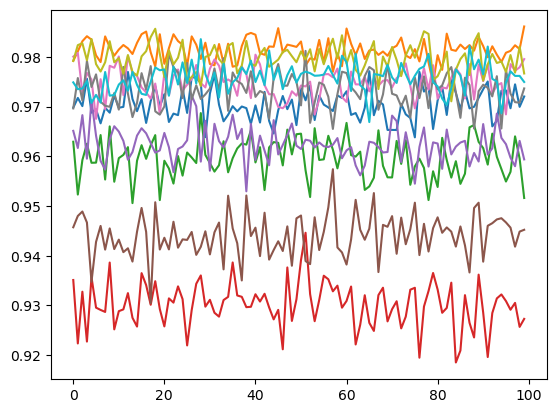

: 

In [56]:
#creare a stacked bar chart
for i in  range(10):
    plt.plot(np.arange(100),timeseries_data[:,i,i])

In [38]:
timeseries_data[:,2,1]

array([0.6026946 , 0.99008065, 0.84995025, 0.        , 0.        ,
       0.        , 0.        , 0.7153627 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.38864297,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.50637275, 0.56754714,
       0.        , 0.3857537 , 0.        , 0.4958673 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.5948121 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.7467801 , 0.60531676, 0.        , 0.        ,
       0.        , 0.9909604 , 0.        , 0.69166666, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.8446691 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn import datasets
import tqdm.notebook as tdqm


array([  2.86617207,   3.09320913,   3.86520321,   4.18269394,
         4.74970389,   5.21395049,   5.70848387,   6.88520401,
         7.06130003,   7.47036375,   8.13992623,   8.96769972,
         9.52194017,  10.1128536 ,  10.26048204,  12.15732106,
        13.2783009 ,  14.09581365,  16.13313255, 510.87023407])

In [3]:
sklearn_dataset = datasets.load_diabetes()

data,y = sklearn_dataset.data,sklearn_dataset.target.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)
#normalise data
mean,std = np.mean(X_train,axis=0),np.std(X_train,axis=0)
X_train = (X_train -mean )/std
X_test = (X_test - mean)/std
# calulate gaussian kernel
data_train = [np.exp(-X_train @ X_train.T),X_train @ X_train.T]
label_train = [y_train,y_train]
data_test = [np.exp(-X_test @ X_train.T),X_test @ X_train.T]
label_test = [y_test,y_test]
    
l = []
for num_components in tdqm.tqdm(range(1,200)):
    for i,(U,V,lu,lv) in enumerate(zip(data_train,data_test,label_train,label_test)):
        pca = PCA(n_components=num_components)
        dtr = pca.fit_transform(U)
        dts = pca.transform(V)
        clf = LinearRegression().fit(dtr, lu)
        l.append((num_components,i,clf.score(dts,lv),clf.score(dtr,lu)))

  0%|          | 0/199 [00:00<?, ?it/s]

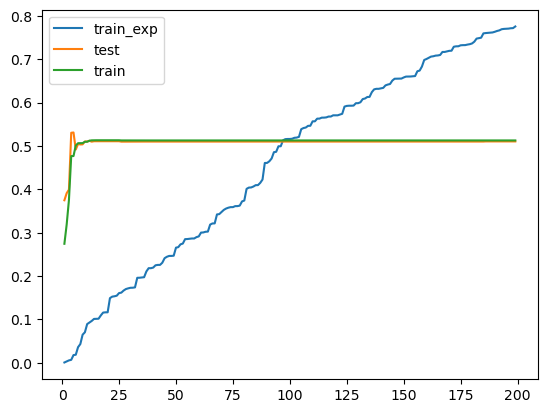

In [13]:

sklearn_dataset = datasets.load_breast_cancer()





data,y = sklearn_dataset.data,sklearn_dataset.target
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)
#normalise data
mean,std = np.mean(X_train,axis=0),np.std(X_train,axis=0)
X_train = (X_train -mean )/std
X_test = (X_test - mean)/std
# calulate gaussian kernel
data_train = [np.exp(-X_train @ X_train.T),X_train @ X_train.T]
label_train = [y_train,y_train]
data_test = [np.exp(-X_test @ X_train.T),X_test @ X_train.T]
label_test = [y_test,y_test]
    
l = []
for num_components in tdqm.tqdm(range(1,50)):
    for i,(U,V,lu,lv) in enumerate(zip(data_train,data_test,label_train,label_test)):
        pca = PCA(n_components=num_components)
        dtr = pca.fit_transform(U)
        dts = pca.transform(V)
        clf = LogisticRegression(penalty="l2", max_iter=10000,solver='sag').fit(dtr, lu)
        l.append((num_components,i,clf.score(dts,lv),clf.score(dtr,lu)))
l = np.array(l)
plt.plot(l[:,0][l[:,1]==0],l[:,2][l[:,1]==0],label="test_exp")
plt.plot(l[:,0][l[:,1]==0],l[:,3][l[:,1]==0],label="train_exp")

plt.plot(l[:,0][l[:,1]==1],l[:,2][l[:,1]==1],label="test")
plt.plot(l[:,0][l[:,1]==1],l[:,3][l[:,1]==1],label="train")
plt.legend()

  0%|          | 0/49 [00:00<?, ?it/s]

In [18]:
#randomly project the data
data = np.random.rand(100,20)
y =np.random.randint(0,2,100)
data.shape

(100, 20)

In [ ]:
def random_ff():
    

In [4]:
import random
random.randint(0,1)

0